# How To Read GIS Files Using GeoPandas

I first show how to open a shapefile and then a GDB file.

This is a basic overview. Read more at these resources:
- https://geohackweek.github.io/vector/04-geopandas-intro/
- https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626
- http://geopandas.org/

In [12]:
## Import packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import fiona
pd.options.display.max_rows = 4

##Read a Shapefile

In [2]:
## Portland Maps shapefile filepaths

## My Filepath (replace this with your own):
folder_path = '/Users/sofiawright/Documents/Hack_Oregon/Datasets/'

# Bridges
filepath_bridges = folder_path + 'Major_River_Bridges/Major_River_Bridges.shp'
# Building Footprints
filepath_footprints = folder_path + 'Building_Footprints/Building_Footprints.shp'
# Community Centers
filepath_community_centers = folder_path + 'community_centers/community_centers.shp'
# Hospitals
filepath_hospitals = folder_path + 'hospitals/hospital.shp'
# Neighborhoods
filepath_neighborhoods = folder_path + 'Neighborhoods_regions/Neighborhoods_regions.shp'
# Railroads
filepath_rr = folder_path + 'railroad/railroad.shp'
# Unreinforced Masonry Buildings
filepath_umb = folder_path + 'Unreinforced_Masonry_Buildings/Unreinforced_Masonry_Buildings.shp'

###Get an overview sense of the data:
- Number of rows and columns.
- Memory Usage.
- Look at first 3 rows.

In [3]:
## First, read the data. Here we'll look at the neighborhood data set.
data = gpd.read_file(filepath_neighborhoods)

In [4]:
print(data.shape) ## Rows and columns.
print(data.memory_usage().sum()) ## Total bytes used.
data.head(4) ## First three rows.

(101, 11)
8968


,OBJECTID,NAME,COMMPLAN,SHARED,COALIT,HORZ_VERT,MAPLABEL,ID,Shape_Leng,Shape_Area,geometry
0,1,ST. JOHNS,,,NPNS,HORZ,St. Johns,84,32669.063081,5.828918e+07,POLYGON ((-122.7246126805451 45.59615788693674...
1,2,HAYDEN ISLAND NEIGHBORHOOD NETWORK,,,NPNS,HORZ,Hayden Island,33,27707.083425,1.704519e+07,POLYGON ((-122.6547874437908 45.60254268202332...
2,3,KENTON,ALBINA,,NPNS,VERT,Kenton,44,19182.565606,1.816857e+07,"POLYGON ((-122.7079732080969 45.5771324370978,..."
3,4,BRIDGETON,,,NPNS,HORZ,Bridgeton,12,7279.692148,1.333067e+06,POLYGON ((-122.6547874437908 45.60254268202332...


###Print a list of the fields and their data types.

In [5]:
datatypes = data.dtypes
for i in range(0,len(datatypes)):
    print (datatypes.index[i], datatypes[i])

print('\n')
    
## For ease of copying into a spreadsheet, I also printed each list separately.
# Field names:
for i in range(0,len(datatypes)):
    print(datatypes.index[i])
print('\n')
# Field data types:
for i in range(0,len(datatypes)):
    print(datatypes[i])

OBJECTID int64
NAME object
COMMPLAN object
SHARED object
COALIT object
HORZ_VERT object
MAPLABEL object
ID int64
Shape_Leng float64
Shape_Area float64
geometry object


OBJECTID
NAME
COMMPLAN
SHARED
COALIT
HORZ_VERT
MAPLABEL
ID
Shape_Leng
Shape_Area
geometry


int64
object
object
object
object
object
object
int64
float64
float64
object


###Plot the shapefile contents

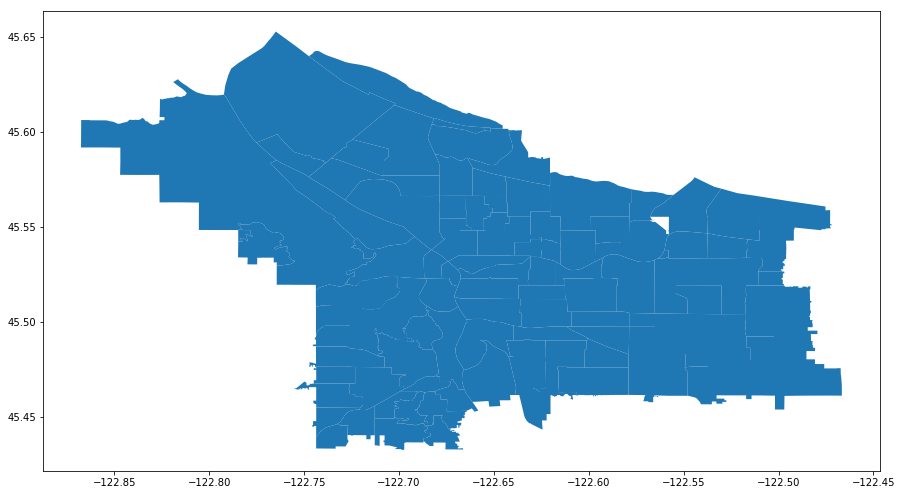

In [6]:
data.plot(figsize=(15,15))

###Format your plots

The geopanda plot function has the same input options as matplotlib and panda dataframe options. We can change the colors on the graph, and even use colors to highlight a specific neighborhood.

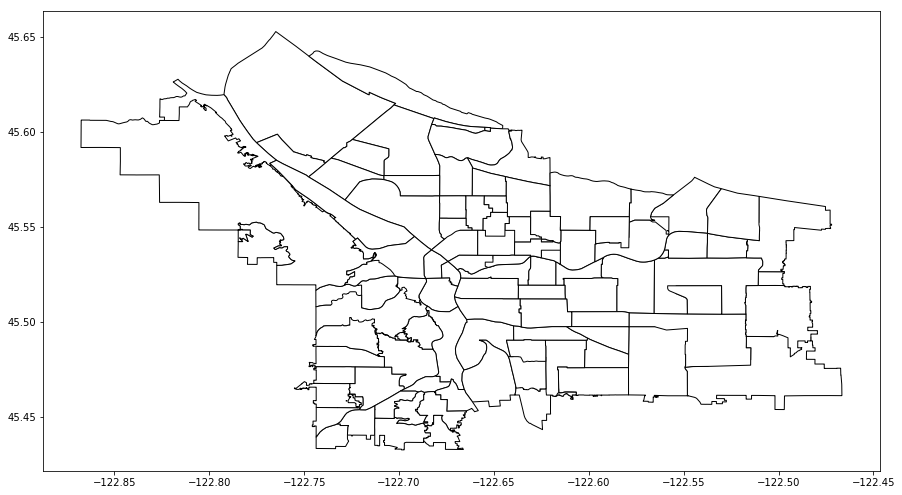

In [7]:
## Change the fill color ("color") and border colors ("edgecolor").
data.plot(color='white', edgecolor='black', figsize=(15,15))

Use colormaps (cmap) to assign a color on a scale based on a specified column's values. 

Note that 'column' and 'cmap' inputs will replae the 'color' input.

More on colormaps here: https://matplotlib.org/users/colormaps.html

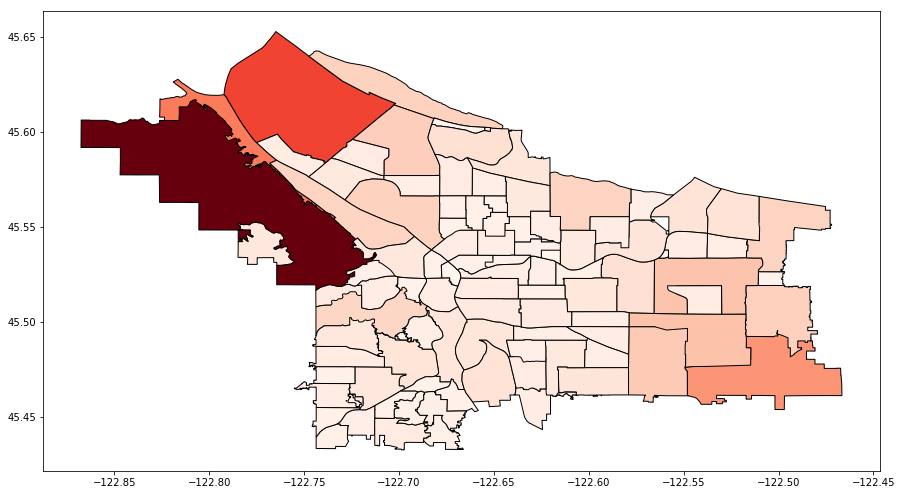

In [37]:
data.plot(column='Shape_Area', cmap='Reds', edgecolor='black', figsize=(15,15))

We can also highlight qualitative data, by getting a bit creative with a new column. Let's highlight Buckman neighborhood. The colors for the fill is assigned by default (there should be a way to change this).

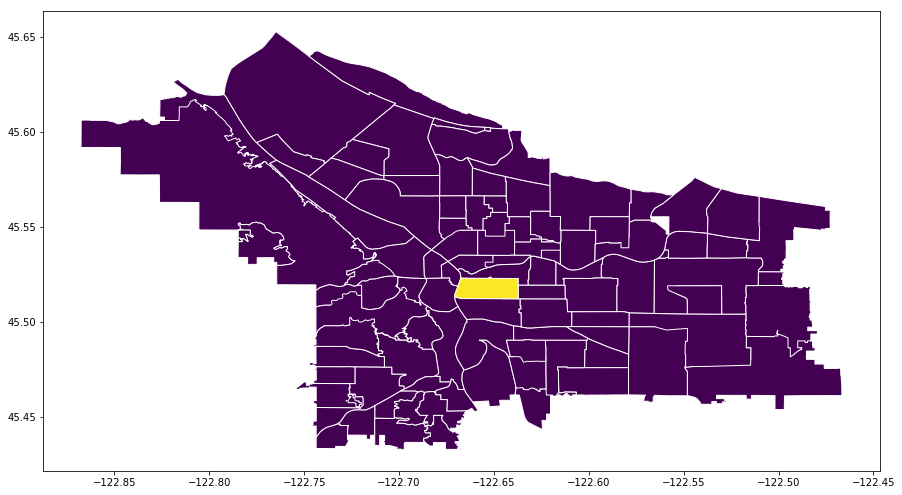

In [8]:
## Duplicate your dataframe, then add a new column to specify the row that is for Buckman neighborhood.
my_neighborhood = data
my_neighborhood['Buckman'] = data.NAME.str.contains('BUCKMAN')

my_neighborhood.plot(column='Buckman', edgecolor='white', figsize=(15,15))

##Read a GDB File

Part of the DOGAMI data is gdb files. Here's how to read those.

Note: I have not included the data here as that has not been publicly released yet.

In [11]:
## DOGAMI gdb filepath

## My Filepath (replace this with your own):
folder_path = '/Users/sofiawright/Documents/Hack_Oregon/Datasets/DOGAMI_Main/'

filepath_DOGAMI = folder_path + 'RDPO_Earthquake_Impact_Analysis_Phase1.gdb'

A GDB file is comprised of multiple layer files. These layer files are not named in a way that is transparent as to what each layer holds, but that data is stored in the overall gdb file, and we can view the names of the layers using the Python package, fiona.

In [14]:
## View the names of the layers.
fiona.listlayers(filepath_DOGAMI)

Then we can reference this list and call on specific layers by title to view the data. All the same operations we performed on the shapefile data can be used on the layers data too.

In [19]:
data = gpd.read_file(filepath_DOGAMI, layer = 'Jurisdictions')
print(data.shape) ## Rows and columns.
print(data.memory_usage().sum()) ## Total bytes used.
data.head(4) ## First three rows.

In [20]:
## Plot data
data.plot(figsize=(15,15))